In [9]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy
!pip install statsmodels seaborn





[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Linear regression is a simple way to predict one thing using another by drawing a straight line through the data.

* Predicts an output (dependent variable Y (Target Variable)) from an input (independent variable X)
* Uses a straight line called the line of best fit
* The intercept is where the line starts (At X = 0 what will be the Value of Y)
* The slope/coeffiecent shows how much the output changes when the input increases how  much y increases when x incresed by 1 unit
* Helps find relationships and make numerical predictions
* Works well only if errors are random, independent, and consistent

In [10]:
import pandas as pd
#import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
df = pd.read_csv('../data/raw/Adcampaign.csv')
df.head()

,Month,No. of Adverts (X),No. of bookings (Y)
0,1,20,61
1,2,24,77
2,3,30,72
3,4,23,66
4,5,27,85


### When you draw a scatter plot before linear regression, you are checking if the points roughly form a straight line.

* Look for an upward or downward line pattern
* It doesn’t need to be perfect, just a clear trend
* Curved patterns can still work if you transform them
* This helps you decide if linear regression is suitable for the data

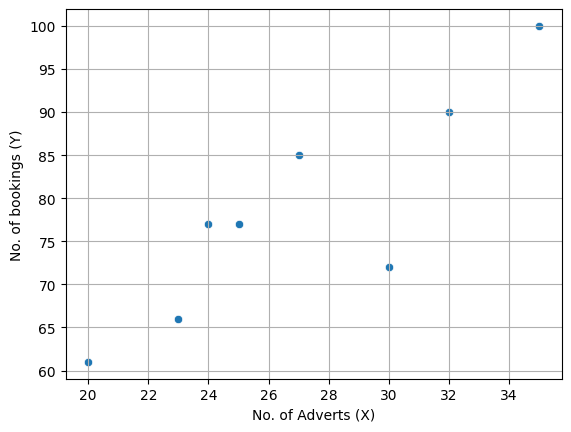

In [12]:
sns.scatterplot(data = df, x = 'No. of Adverts (X)', y = 'No. of bookings (Y)')
plt.grid()

From the graph, even if the points don’t form a perfect line, a straight line can still reasonably represent the sales pattern because some error is always expected in real data.

A perfect fit is not required — a rough linear trend is acceptable

The error term accounts for the natural variation in data

This error is expected to be random and normally distributed

A straight line is therefore a practical and reasonable model here

Reading Seltman’s simple linear regression chapter gives deeper understanding of this concept

<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

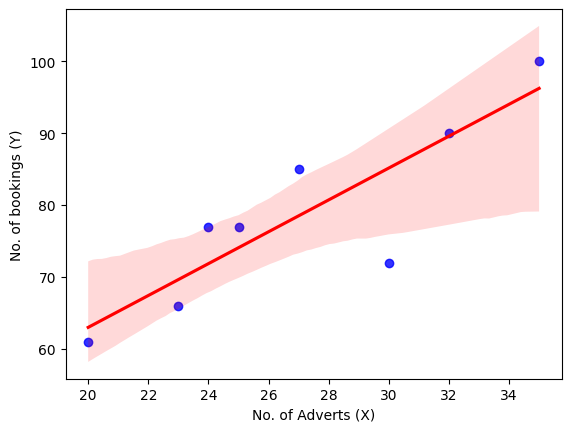

In [13]:
sns.regplot(data = df, x = 'No. of Adverts (X)', y = 'No. of bookings (Y)', ci=95, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

In the regression plot, the shaded area around the line is the 95% confidence interval.

It shows the range where the mean number of bookings is likely to fall for a given number of adverts

It is not predicting the exact bookings, only the average expected bookings

This interval is often inside the data points because it’s about the mean, not individual values

In statistics, we assume the experiment could be repeated many times and this range shows where the average would fall

Since the graph shows a reasonable linear trend, we can proceed with linear regression

For now, we focus only on modeling bookings from adverts, not on train/test splits

Next step is converting the pandas DataFrame into a NumPy array to use in the model

***********************************************************************************

Train/test split is used to check how well the model predicts unseen data

Here, the aim is only to see whether adverts and bookings have a linear relationship

We are exploring and understanding the pattern, not validating the model yet

Splitting the data at this stage would distract from the main learning objective

In [15]:
x=df['No. of Adverts (X)'].to_numpy().reshape((-1, 1))
y=df['No. of bookings (Y)'].to_numpy().reshape((-1, 1))

After building the regression model, we use R² (coefficient of determination) to measure how well the line fits the data.

R² ≈ 75% means adverts explain about 75% of the variation in bookings

It’s only one indicator and can be misleading

A high R² does not guarantee good predictions

We also check the intercept (a) and slope (b) to understand the regression equation and how adverts affect bookings

In [18]:
model =LinearRegression().fit(x,y)

r_sq = model.score(x, y)
y_pred=model.predict(x)
df['error']=y-y_pred

print('coefficient of determination / square:', r_sq)
print('intercept:', model.intercept_)
print('coefficent:', model.coef_)



coefficient of determination / square: 0.7541051880057117
intercept: [18.67045455]
coefficent: [[2.21590909]]


   Month  No. of Adverts (X)  No. of bookings (Y)      error
0      1                  20                   61  -1.988636
1      2                  24                   77   5.147727
2      3                  30                   72 -13.147727
3      4                  23                   66  -3.636364
4      5                  27                   85   6.500000
5      6                  25                   77   2.931818
6      7                  32                   90   0.420455
7      8                  35                  100   3.772727


<Axes: xlabel='No. of bookings (Y)', ylabel='error'>

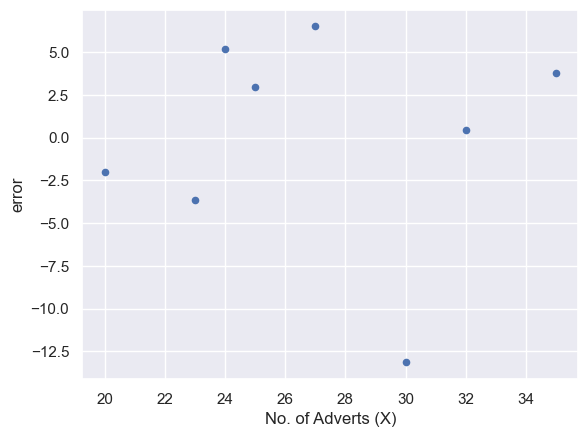

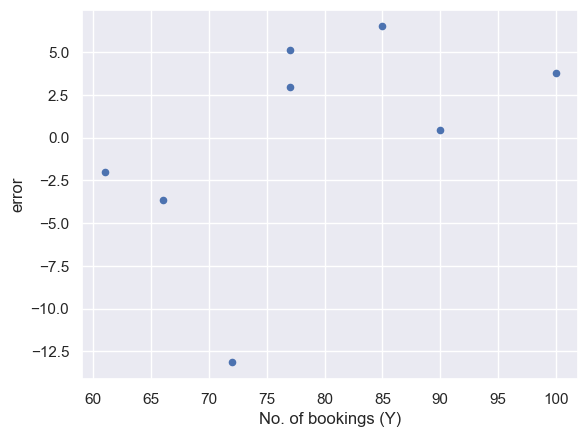

In [29]:
df['error'] =  y - y_pred
print(df)

df.plot.scatter(x = 'No. of Adverts (X)', y = 'error')

df.plot.scatter(x='No. of bookings (Y)', y='error')

What your plot shows (the pattern)

Move from left to right:

Errors start below 0 (model predicting too high)

Then errors go very below 0 (very wrong)

Then errors move above 0 (now predicting too low)

Then come back toward 0

That is a wave shape.

A wave = curve in data.

But you used a straight line.

In [37]:

df4=df
df4=df4.rename(columns={"No. of bookings (Y)":"Y","No. of Adverts (X)":"X"})
formula_str="Y~X"  # y is dependent variable, X is independent variable Y dependent on X
print(df4)

results = sm.ols(formula=formula_str, data=df4).fit()
print(results.summary())

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
print( lzip(name,test))


   Month   X    Y      error
0      1  20   61  -1.988636
1      2  24   77   5.147727
2      3  30   72 -13.147727
3      4  23   66  -3.636364
4      5  27   85   6.500000
5      6  25   77   2.931818
6      7  32   90   0.420455
7      8  35  100   3.772727
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     18.40
Date:                Sat, 24 Jan 2026   Prob (F-statistic):            0.00515
Time:                        23:24:47   Log-Likelihood:                -25.598
No. Observations:                   8   AIC:                             55.20
Df Residuals:                       6   BIC:                             55.36
Df Model:                           1                                         
Covariance Type:            

* Dep. Variable: --> Target Variable
* No. Observations: no of obv means total entries
* Df Residuals: n - p - 1
    Where n = No. Observations
    p = no of features
    1 = intersect
* Df Model: Degree of Freedom (Number of Features )
* Covariance Type: nonrobust (Equally Scatterd if not then robust)
* R-squared: It Represents The Variablity how much % is explained by the model and Remaining Are noise (How well it fits the Model)
* Adj. R-squared: It penalise noise and Increase if Feature is Useful



In [38]:
formula_str="Y~0+X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

   Month   X    Y      error
0      1  20   61  -1.988636
1      2  24   77   5.147727
2      3  30   72 -13.147727
3      4  23   66  -3.636364
4      5  27   85   6.500000
5      6  25   77   2.931818
6      7  32   90   0.420455
7      8  35  100   3.772727
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              964.4
Date:                Sat, 24 Jan 2026   Prob (F-statistic):                    9.27e-09
Time:                        23:26:01   Log-Likelihood:                         -26.617
No. Observations:                   8   AIC:                                      55.23
Df Residuals:                       7   BIC:                                      55.31
Df Model:                          